#**The Job**

<div>
<center>
<img src="https://raw.githubusercontent.com/shstreuber/Data-Mining/master/images/totalinsurance.jpg" width="300">
</div>

**CONGRATULATIONS AND WELCOME TO THE TOTAL INSURANCE VEHICLE DIVISION!**
</div>

Your managers at Total Insurance, an insurance carrier for home, health, and vehicles, have seen your work in their Health Division and are suitably impressed. You have received 1,000 mini balloons to decorate your desk.

<div>
<center>
<img src="https://github.com/shstreuber/Data-Mining/blob/master/images/1000.JPG?raw=true" width="300">
</div>
</center>

Total Insurance has had significant losses from car insurance fraud, i.e. clients reporting accidents that never happened or inflating the repair or replacement cost for their vehicles--and the company needs to crack down on this problem (so they can afford more mini balloons).

You have been given an actual database export, and it is your job now to build a Deep Learning architecture that will predict

1. Whether a client is likely to commit insurance fraud or not, or
2. How many claims the client may submit to the insurance in the future.

This is a large dataset with a lot of dimensions, which complicates your assignment. You will need to:
1. Clean the data (your manager has already prepared that part)
2. Determine your target attribute
2. Determine which attributes/ features are most relevant to predict your target attribute.
3. Preprocess the features
4. Build the model
4. Run and optimize the model and PROVE that it does what it is supposed to do.

#**0. Preparation**
We will build our Deep Learning architecture on Tensorflow. Why Tensorflow? Because it is easier to build on Colab than Pytorch (for more about the battle of the giants, i.e. Tensorflow vs Pytorch, [read here](https://)).

In [ ]:
import tensorflow as tf # This tells Colab that we are using TensorFlow

from tensorflow import keras # This is the main TensorFlow library
from tensorflow.keras.models import Sequential # We are building a model that runs its layers in sequential order
from tensorflow.keras import layers # We are building a Neural Network with several hidden layers
from tensorflow.keras.layers import Dense # This will help us build a fully connected architecture
from tensorflow.keras.layers.experimental import preprocessing #

print("Current TensorFlow version is", tf.__version__)

import numpy as np # Your basic mathematical library for big datasets
import pandas as pd # The library you need in order to clean and manipulate big datasets
import matplotlib.pyplot as plt # Makes pretty pictures
import seaborn as sns # for visualization aka more pretty pictures
from sklearn.model_selection import train_test_split # Scikit-Learn is the default data science library
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42) # Setting a seed value for the randomizer so we get repeatable results

Current TensorFlow version is 2.15.0


In [ ]:
#Reading in the data as fraud dataframe
fraud = pd.read_csv("https://raw.githubusercontent.com/shstreuber/Data-Mining/master/data/car_insurance_fraud.csv")
fraud.head(10) # Let's look at the first 10 rows

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AddressChange_Claim,NumberOfCars,BasePolicy,VehiclePrice,PastNumberOfClaims,FraudFound_P
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,1 year,4,Liability,71957,0,0
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,no change,1,Collision,78154,0,0
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,no change,1,Collision,89281,1,0
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,no change,1,Liability,21201,1,0
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,no change,1,Collision,69310,0,0
5,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,...,5 years,21 to 25,No,No,no change,1,Collision,93540,0,0
6,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,...,7 years,36 to 40,No,No,no change,1,Collision,74619,1,0
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,new,16 to 17,No,No,no change,1,Collision,77355,1,0
8,Dec,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,...,6 years,31 to 35,No,Yes,no change,1,Collision,87637,0,0
9,Apr,3,Tuesday,Ford,Urban,Wednesday,Apr,3,Male,Married,...,more than 7,36 to 40,No,No,no change,1,All Perils,69502,3,0


In [ ]:
fraud.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'VehicleCategory', 'PolicyNumber',
       'RepNumber', 'Deductible', 'DriverRating', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent',
       'AddressChange_Claim', 'NumberOfCars', 'BasePolicy', 'VehiclePrice',
       'PastNumberOfClaims', 'FraudFound_P'],
      dtype='object')

In [ ]:
fraud.BasePolicy.unique()

array(['Liability', 'Collision', 'All Perils'], dtype=object)

#**1. Exploratory Data Analysis (EDA)**

Exploratory data analysis involves techniques such as summary statistics, data visualization, and graphical representations to reveal hidden patterns, relationships, or trends within the data. EDA is an essential preliminary step in the data analysis pipeline, helping to uncover meaningful information and guide further exploration or hypothesis testing.

You can get a quick and easy overview with df.describe(include = all). To identify missing values and datatypes, df.isna().sum() and df.dtypes work well.







In [ ]:
# Any missing values?
fraud.isna().sum();

Month                  0
WeekOfMonth            0
DayOfWeek              0
Make                   0
AccidentArea           0
DayOfWeekClaimed       0
MonthClaimed           0
WeekOfMonthClaimed     0
Sex                    0
MaritalStatus          0
Age                    0
Fault                  0
VehicleCategory        0
PolicyNumber           0
RepNumber              0
Deductible             0
DriverRating           0
AgeOfVehicle           0
AgeOfPolicyHolder      0
PoliceReportFiled      0
WitnessPresent         0
AddressChange_Claim    0
NumberOfCars           0
BasePolicy             0
VehiclePrice           0
PastNumberOfClaims     0
FraudFound_P           0
dtype: int64

In [ ]:
# What data types and input features do we have? What could be our output label? Do we already have a label that contains the information, or do we need to create one?
fraud.dtypes;

Month                  object
WeekOfMonth             int64
DayOfWeek              object
Make                   object
AccidentArea           object
DayOfWeekClaimed       object
MonthClaimed           object
WeekOfMonthClaimed      int64
Sex                    object
MaritalStatus          object
Age                     int64
Fault                  object
VehicleCategory        object
PolicyNumber            int64
RepNumber               int64
Deductible              int64
DriverRating            int64
AgeOfVehicle           object
AgeOfPolicyHolder      object
PoliceReportFiled      object
WitnessPresent         object
AddressChange_Claim    object
NumberOfCars            int64
BasePolicy             object
VehiclePrice            int64
PastNumberOfClaims      int64
FraudFound_P            int64
dtype: object

In [ ]:
#Let's look more closely at the data
fraud.describe();print("***NUMERIC DATA OVERVIEW***");# Build a data summary for the NUMERIC data in the set. Let's see if this will be enough

***NUMERIC DATA OVERVIEW***


In [ ]:
#Let's look more closely at all data. Do we need all of these in order to predict whether someone has committed insurance fraud?
fraud.describe(include = 'all'); print("***DATA OVERVIEW***"); # Build a data summary for ALL data in the set (not just numeric!)

***DATA OVERVIEW***


(        Month   WeekOfMonth DayOfWeek     Make AccidentArea DayOfWeekClaimed  \
 count   15420  15420.000000     15420    15420        15420            15420   
 unique     12           NaN         7       19            2                8   
 top       Jan           NaN    Monday  Pontiac        Urban           Monday   
 freq     1411           NaN      2616     3837        13822             3757   
 mean      NaN      2.788586       NaN      NaN          NaN              NaN   
 std       NaN      1.287585       NaN      NaN          NaN              NaN   
 min       NaN      1.000000       NaN      NaN          NaN              NaN   
 25%       NaN      2.000000       NaN      NaN          NaN              NaN   
 50%       NaN      3.000000       NaN      NaN          NaN              NaN   
 75%       NaN      4.000000       NaN      NaN          NaN              NaN   
 max       NaN      5.000000       NaN      NaN          NaN              NaN   
 
        MonthClaimed  Week

##**Findings**
0. **MISSING DATA?** No. All fields have 15420 data points.
1. **POSSIBLE TARGET VARIABLES**:
  
    **- BINARY** (Classification): Potentially FraudFound_P, which is either 0 or 1. We could predict whether certain input parameters make it more or less likely that a claim is fraudulent.
    
    **- CATEGORICAL** (Classification): Potentially PastNumberOfClaims, which has 10 levels. We could predict how many claims a driver with certain parameters is likely to make.

    **- NUMERIC** (Regression): We could predict the VehiclePrice, which, when paired with the BasePolicy, could determine the insurance payout if car is  total loss.
2. **QUESTIONS TO ASK**: Which input attributes are relevant to our target variable? Which input attributes are not relevant?
3. **ANY PROBLEMATIC DATA?**: Yes; DayOfWeekClaimed and MonthClaimed have 8 and 13 levels when they should have 7 and 12. To determine what to do, we will check how many datapoints these are; if not too many, their (non)existence will not affect the final outcome, and we can discard. If more than 5%, we will keep and substitute an appropriate value.
4. **ANY INCONSISTENT DATA?**: Yes. The Age Variable contains a group of 0 (zero) values that either need to be cleaned up or the rows discarded. To determine what to do, we will check how many datapoints these are; if not too many, their (non)existence will not affect the final outcome, and we can discard. If more than 5%, we will keep and substitute an appropriate value based on a related measure, AgeOfPolicyHolder.
5. **ANY OPPORTUNITIES FOR SIMPLIFYING?**: Yes. AgeOfVehicle should really be numeric and can be easily transformed.
6. **ANY OPPORTUNITIES FOR REDUCING THE DATAFRAME FOR EASE OF PROCESSING IN A NEURAL NETWORK?**: Yes. We know that multiple layers are very computation-heavy, so smaller datasets process more easily. We will evaluate whether we need all the attributes to predict the chosen target variable.

#**2A. Data Cleanup**
Let's clean the data up so we remove any potential noise and clean up any missing and inconsistent values. We will address findings 3 and 4 above.

When dealing with text, data cleanup often also involves removing special characters or changing character sets.

###**2A1: DayOfWeekClaimed and MonthClaimed Issue**

In [ ]:
# 3. 8 Days and 13 Months

DOWC = fraud.DayOfWeekClaimed.unique();
MC = fraud.MonthClaimed.unique();
print("DayOfWeekClaimed:", DOWC, "\nMonthClaimed:", MC);

DayOfWeekClaimed: ['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0'] 
MonthClaimed: ['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']


In [ ]:
# How many rows with '0' in DayOfWeekClaimed and MonthClaimed?;
DOWC0_count = fraud[fraud['DayOfWeekClaimed'] == '0'];
MC0_count = fraud[fraud['MonthClaimed'] == '0'];
# print("DayOfWeekClaimed:", DOWC0_count, "\nMonthClaimed:", MC0_count);
DOWC0_count;
MC0_count;

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AddressChange_Claim,NumberOfCars,BasePolicy,VehiclePrice,PastNumberOfClaims,FraudFound_P
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,...,new,16 to 17,No,No,no change,1,All Perils,80615,0,0


In [ ]:
# OK, just one row! Let's verify that the index number is 1516.
display(fraud.iloc[1516])

Month                            Jul
WeekOfMonth                        2
DayOfWeek                     Monday
Make                           Honda
AccidentArea                   Rural
DayOfWeekClaimed                   0
MonthClaimed                       0
WeekOfMonthClaimed                 1
Sex                             Male
MaritalStatus                 Single
Age                                0
Fault                  Policy Holder
VehicleCategory                Sedan
PolicyNumber                    1517
RepNumber                         15
Deductible                       400
DriverRating                       2
AgeOfVehicle                     new
AgeOfPolicyHolder           16 to 17
PoliceReportFiled                 No
WitnessPresent                    No
AddressChange_Claim        no change
NumberOfCars                       1
BasePolicy                All Perils
VehiclePrice                   80615
PastNumberOfClaims                 0
FraudFound_P                       0
N

In [ ]:
# Let's get rid of that row! We know that the index number is 1516 and can use iloc to locate it in the dataframe.
fraud.drop(1516, inplace = True)
display(fraud.iloc[1516])

# Note the name below of the new row with index 1516!

Month                            Apr
WeekOfMonth                        1
DayOfWeek                   Saturday
Make                           Mazda
AccidentArea                   Urban
DayOfWeekClaimed             Tuesday
MonthClaimed                     Apr
WeekOfMonthClaimed                 1
Sex                           Female
MaritalStatus                 Single
Age                               26
Fault                  Policy Holder
VehicleCategory                Sedan
PolicyNumber                    1518
RepNumber                         16
Deductible                       400
DriverRating                       3
AgeOfVehicle                 6 years
AgeOfPolicyHolder           31 to 35
PoliceReportFiled                 No
WitnessPresent                    No
AddressChange_Claim        no change
NumberOfCars                       4
BasePolicy                 Collision
VehiclePrice                   20110
PastNumberOfClaims                 4
FraudFound_P                       0
N

###**2A2: Age Variable Issue**

Rows with Age == 0: 319 *** Percent of Total: 2.068876062001427 %


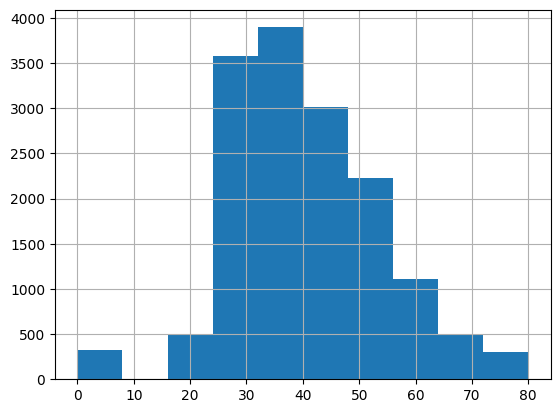

In [ ]:
# 4. The Age variable containing the 0 values--how relevant is that? Let's check the distribution and the count:

fraud.Age.hist() # Visually check whether Age == 0 is an outlier; if small outlier, then drop the rows?
Age0_count = fraud[fraud['Age'] == 0].count() # How many rows are impacted?
Age0_percent = (Age0_count/fraud.count())*100 # How many percent of rows are impacted? If less than 5%, we will drop the rows

print('Rows with Age == 0:', Age0_count[1], '*** Percent of Total:', Age0_percent[1],"%")

In [ ]:
# The 2% really doesn't make a difference, so we are removing them
fraud = fraud[fraud['Age'] > 0]
fraud.shape

(15100, 27)

#**2B. Preprocessing**
Preprocessing means formatting the data such that it can work with the selected algorithm(s).

This is the point at which you will start making decisions on how you want to design your model.
<center>
<img src = "https://media.licdn.com/dms/image/C5612AQHWhI_0S0b_Pw/article-cover_image-shrink_600_2000/0/1645684670460?e=2147483647&v=beta&t=Nh2TVm1ND20u1G7BV8IHTqEw-ufvlntMqHNf14CZHzs">
</center>

And some decisions will be easier than others.

###**2B1: Age of Vehicle Cleanup--Data Substitution**

In [ ]:
# 5. Age of Vehicle can be easily transformed into numbers
fraud.AgeOfVehicle.unique() # How many levels do we have in this categorical attribute?

array(['3 years', '6 years', '7 years', 'more than 7', '5 years',
       '4 years', '2 years', 'new'], dtype=object)

In [ ]:
fraud.AgeOfVehicle.replace('new','1', inplace=True)
fraud.AgeOfVehicle.replace('2 years','2', inplace=True)
fraud.AgeOfVehicle.replace('3 years','3', inplace=True)
fraud.AgeOfVehicle.replace('4 years','4', inplace=True)
fraud.AgeOfVehicle.replace('5 years','5', inplace=True)
fraud.AgeOfVehicle.replace('6 years','6', inplace=True)
fraud.AgeOfVehicle.replace('7 years','7', inplace=True)
fraud.AgeOfVehicle.replace('more than 7','10', inplace=True)
fraud.AgeOfVehicle.head()

0     3
1     6
2     7
3    10
4     5
Name: AgeOfVehicle, dtype: object

In [ ]:
# Since data type is still object, we will make this numeric
fraud["AgeOfVehicle"] = pd.to_numeric(fraud["AgeOfVehicle"])
fraud.AgeOfVehicle.dtype

dtype('int64')

In [ ]:
fraud.FraudFound_P.unique()

array([0, 1])

In [ ]:
print("Data Type is now",fraud.FraudFound_P.dtype);

Data Type is now int64


###**2B2: FraudFound_P Data Type--Transformation to categorical**
If we want to predict **FraudFound_P**, it needs to be categorical and not numeric (aka int64). This is why we need to transform this attribute from numeric to categorical.

In [ ]:
#fraud["FraudFound_P"] = fraud["FraudFound_P"].astype('object')
print("Data Type is now",fraud.FraudFound_P.dtype)

Data Type is now int64


###**2B2: DECISION NEEDED: PastNumberOfClaims**
How to treat PastNumberOfClaims requires **decision-making**.

In [ ]:
fraud.PastNumberOfClaims.dtype

dtype('int64')

In [ ]:
fraud.PastNumberOfClaims.unique()

array([ 0,  1,  3,  2,  5, 10,  8,  4,  9,  6,  7])

**THE DECISION**

1. We are seeing that originally, PastNumberOfClaims is numeric.
If we use it as a numeric output attribute in a DL model, we will need to use a regression setup: 1-node output layer with MSE as loss function and "linear" as activation function
2. We are also seeing that PastNumberOfClaims has only 10 different values. So, it would be possible to use it as a categorical setup: 10-node output layer with categorical_crossentropy as loss function and "softmax" as activation function. To do this, however, we would have to convert PastNumberOfClaims into a categorical attribute (you saw above how to do this with FraudFound_P).

<center>
<img src = "https://github.com/shstreuber/Data-Mining/blob/master/images/regorclass.JPG?raw=true" height = 400>
</center>

What are you going to choose?


#####**EXERCISE 1: IF YOU DECIDE TO USE NUMBER 2 ABOVE: Transform PastNumberOfClaims from numeric to object**
Use the line below to transform PastNumberOfClaims just like what you have seen above and remember to check whether your transformation was successful!

To keep your options open, don't simply replace the value; instead, add add a new column in which to store the new datatype, like this:

```
# Creating a new attribute and populating it with the contents of the attribute that we want to transform.
PastNumberOfClaims_cat=fraud.PastNumberOfClaims

# Adding the new attribute to the dataframe
fraud['PastNumberOfClaims_cat'] = PastNumberOfClaims_cat
```

Then you can use the example code from FraudFound_P to convert PastNumberOfClaims_cat to type object.

In [ ]:
PastNumberOfClaims_cat=fraud.PastNumberOfClaims
fraud['PastNumberOfClaims_cat'] = PastNumberOfClaims_cat


###**2B3: DECISION NEEDED: Determining the Data Frames**
With the MNIST dataset, we saw that when processing even simple images, we found ourselves with 100,000 predictor attributes in the input layer. That is computationally problematic, especially with almost half of our 27 columns holding categorical attributes, which will need to be one-hot encoded to work in a Neural Network and inflate the input layer even more. With the usual [pay-as-you-go cloud processing plans](https://www.techtarget.com/searchstorage/definition/pay-as-you-go-cloud-computing-PAYG-cloud-computing), that can get expensive.

So, we will need to make a few judgment calls and either rely on:
* Common Sense: If we want to predict our target variable, which attributes are less relevant than others?
* Mathematical methods to determine relevance of predictors to the target attribute: For example, correlation and chi square

**DATA FRAMES AND TARGET VARIABLES**

To simplify our work and the processing $$, we should select specific inputs for specific target variables and build smaller dataframes. Here are some options:
1. car attributes to predict VehiclePrice aka replacement cost (fraud_1 dataset)
2. driver attributes to predict PastNumberOfClaims--either as regression or classification (fraud_2 dataset)
3. accident-related attributes to predict FraudFound_P (fraud_3 dataset)

Other, not fraud-related, options could be:
1. Recommend a base policy to sell based on driver attributes
2. What other options can you come up with?

I will show you an example of fraud_1.

#####**Building data frame fraud_1**

In [ ]:
# Car attributes to predict vehicle price
fraud_1 = fraud[['Make', 'VehicleCategory', 'AgeOfVehicle','NumberOfCars','VehiclePrice' ]]
fraud_1.head()

,Make,VehicleCategory,AgeOfVehicle,NumberOfCars,VehiclePrice
0,Honda,Sport,3,4,71957
1,Honda,Sport,6,1,78154
2,Honda,Sport,7,1,89281
3,Toyota,Sport,10,1,21201
4,Honda,Sport,5,1,69310


In [ ]:
fraud_1.dtypes

Make               object
VehicleCategory    object
AgeOfVehicle        int64
NumberOfCars        int64
VehiclePrice        int64
dtype: object

#####**Ideas for data frame fraud_2**

In [ ]:
fraud_2 = fraud[['Sex','MaritalStatus','Age','Fault','DriverRating','PastNumberOfClaims']]
fraud_2.head()

,Sex,MaritalStatus,Age,Fault,DriverRating,PastNumberOfClaims
0,Female,Single,21,Policy Holder,1,0
1,Male,Single,34,Policy Holder,4,0
2,Male,Married,47,Policy Holder,3,1
3,Male,Married,65,Third Party,2,1
4,Female,Single,27,Third Party,1,0


#####**EXERCISE 2: What would you include in data frame fraud_3 with output FraudFound_P?**

In [ ]:
fraud.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'VehicleCategory', 'PolicyNumber',
       'RepNumber', 'Deductible', 'DriverRating', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent',
       'AddressChange_Claim', 'NumberOfCars', 'BasePolicy', 'VehiclePrice',
       'PastNumberOfClaims', 'FraudFound_P', 'PastNumberOfClaims_cat'],
      dtype='object')

In [ ]:
fraud_3 = fraud[['AccidentArea', 'Fault', 'PoliceReportFiled', 'WitnessPresent','FraudFound_P']];

In [ ]:
fraud_3.dtypes
fraud_3.head()

,AccidentArea,Fault,PoliceReportFiled,WitnessPresent,FraudFound_P
0,Urban,Policy Holder,No,No,0
1,Urban,Policy Holder,Yes,No,0
2,Urban,Policy Holder,No,No,0
3,Rural,Third Party,Yes,No,0
4,Urban,Third Party,No,No,0


###**2B4: Preparing the Data for Use with Tensorflow**
There are 4 steps we need to take to prepare the data to run with TensorFlow (before we even consider the architecture of the network):
1. Encoding categorical variables
2. Setting up training and test set
3. Splitting features from labels (to build the input and output layers)
4. Normalize all numeric features

In [ ]:
# We currently have 5 attributes in the fraud_1 dataset; how many are categorical and how many numeric?
fraud_3.dtypes

AccidentArea         object
Fault                object
PoliceReportFiled    object
WitnessPresent       object
FraudFound_P          int64
dtype: object

####**1. One Hot Encoding**
Remember that the input layer for a Neural Network requires numeric information only. We have two categorical variables in our reduced dataset: Make and VehicleCategory.

In [ ]:
# Using One-Hot Encoding with pd.getdummies
fraud_1 = pd.get_dummies(fraud_1, columns=['Make','VehicleCategory'], prefix='', prefix_sep='')
fraud_1.head()

,AgeOfVehicle,NumberOfCars,VehiclePrice,Accura,BMW,Chevrolet,Dodge,Ferrari,Ford,Honda,...,Nissan,Pontiac,Porsche,Saab,Saturn,Toyota,VW,Sedan,Sport,Utility
0,3,4,71957,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,6,1,78154,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,7,1,89281,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,10,1,21201,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,5,1,69310,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
fraud_3 = pd.get_dummies(fraud_3, columns=['AccidentArea', 'Fault', 'PoliceReportFiled', 'WitnessPresent'], prefix='', prefix_sep='');
fraud_3.head()

,FraudFound_P,Rural,Urban,Policy Holder,Third Party,No,Yes,No,Yes
0,0,0,1,1,0,1,0,1,0
1,0,0,1,1,0,0,1,1,0
2,0,0,1,1,0,1,0,1,0
3,0,1,0,0,1,0,1,1,0
4,0,0,1,0,1,1,0,1,0


In [ ]:
fraud_3.head()

,FraudFound_P,Rural,Urban,Policy Holder,Third Party,No,Yes,No,Yes
0,0,0,1,1,0,1,0,1,0
1,0,0,1,1,0,0,1,1,0
2,0,0,1,1,0,1,0,1,0
3,0,1,0,0,1,0,1,1,0
4,0,0,1,0,1,1,0,1,0


In [ ]:
fraud_3.shape

(15100, 9)

As you can see, our three numeric variables appear in the first three columns of the dataset; our encoded variables appear to their right. AND you can see how they have been translated into ones and zeroes. That is what our Neural Network needs in order to process the data.

####**2. Setting up training and test set**
There are different ways to split the data into a training and test set. You can specify a split by line indexes, by percentages, or by number of rows. In our example, we will use percentages to split.

In [ ]:
train_dataset = fraud_1.sample(frac=0.8, random_state=0) # training dataset is 80%, test dataset is 20%. Rows are picked by random sampling
test_dataset = fraud_1.drop(train_dataset.index) # Dropping the index numbers because we want the test set to be autonomous

In [ ]:
train_dataset = fraud_3.sample(frac=0.8, random_state=0);# training dataset is 80%, test dataset is 20%. Rows are picked by random sampling
test_dataset = fraud_3.drop(train_dataset.index); # Dropping the index numbers because we want the test set to be autonomous

In [ ]:
train_dataset.head()

,FraudFound_P,Rural,Urban,Policy Holder,Third Party,No,Yes,No,Yes
8409,0,0,1,1,0,1,0,1,0
8327,0,0,1,1,0,1,0,1,0
610,0,0,1,0,1,1,0,1,0
7625,0,0,1,1,0,1,0,1,0
4097,0,0,1,0,1,1,0,1,0


In [ ]:
test_dataset.head()

,FraudFound_P,Rural,Urban,Policy Holder,Third Party,No,Yes,No,Yes
0,0,0,1,1,0,1,0,1,0
15,0,0,1,1,0,1,0,1,0
23,0,0,1,0,1,1,0,1,0
27,0,0,1,1,0,1,0,1,0
29,0,0,1,1,0,1,0,1,0


####**3. Splitting Features from Labels**
Separate the target value, the "label", from the features. This label is the value that you will train the model to predict--in our case, we want to predict FraudFound_P.

In [ ]:
train_features = train_dataset.copy();
test_features = test_dataset.copy();
train_lable = train_features.pop('FraudFound_P');
test_lable = test_features.pop('FraudFound_P');

In [ ]:
train_features.head()

,Rural,Urban,Policy Holder,Third Party,No,Yes,No,Yes
8409,0,1,1,0,1,0,1,0
8327,0,1,1,0,1,0,1,0
610,0,1,0,1,1,0,1,0
7625,0,1,1,0,1,0,1,0
4097,0,1,0,1,1,0,1,0


In [ ]:
test_features.head()

,Rural,Urban,Policy Holder,Third Party,No,Yes,No,Yes
0,0,1,1,0,1,0,1,0
15,0,1,1,0,1,0,1,0
23,0,1,0,1,1,0,1,0
27,0,1,1,0,1,0,1,0
29,0,1,1,0,1,0,1,0


In [ ]:
test_lable.head()

0     0
15    0
23    0
27    0
29    0
Name: FraudFound_P, dtype: int64

#####**EXERCISE 3: Check the shape of features and labels**
In the code field below, check the shape of the training features and the training labels. Do the same with the test features and the test labels.

In [ ]:
train_features.shape

(12080, 8)

In [ ]:
test_features.shape

(3020, 8)

In [ ]:
train_lable.shape

(12080,)

In [ ]:
test_lable.shape

(3020,)

####**4. Normalize ALL NUMERIC features**
**Why do we need to normalize?**
Remember when we hot-encoded the categorical variables? That's when we translated all categories into either 0 or 1. If one variable has a much larger scale than the others, it can dominate the learning process and overshadow the importance of other features. It's like studying for a test where one chapter is ten times longer than the others – you might end up focusing too much on that chapter and missing out on important information from the others.

To level the playing field and ensure that all features contribute equally to the learning process, we normalize them. Normalization scales all features to a similar range, typically between 0 and 1 or with a mean of 0 and a standard deviation of 1. This way, each feature's contribution is balanced, and the neural network can learn more effectively from all the data.

There are different ways of normalizing data. One way is to do the math manually as you have seen in the previous week's file. Another way is to use the [**preprocessing.Normalization layer**](https://keras.io/api/layers/preprocessing_layers/numerical/normalization/). This layer is a clean and simple way to build that preprocessing into your model. And YES--by creating the normalization layer, you effectively just started building your TensorFlow model:

In [ ]:
normalizer = preprocessing.Normalization(axis=-1);

Now we apply the normalizer to the training features:

In [ ]:
normalizer.adapt(np.array(train_features));

This calculates the mean and variance, and stores them in the layer.

In [ ]:
print(normalizer.mean.numpy());

[[0.10231791 0.8976826  0.7254972  0.27450326 0.97185475 0.0281457
  0.99437094 0.00562914]]


When the layer is called it returns the input data, with each feature independently normalized:

In [ ]:
first = np.array(train_features[:1]);

with np.printoptions(precision=2, suppress=True):
  print('Original data:', first);
  print();
  print('Normalized data:', normalizer(first).numpy());

Original data: [[0 1 1 0 1 0 1 0]]

Normalized data: [[-0.34  0.34  0.62 -0.62  0.17 -0.17  0.08 -0.08]]


#####**EXERCISE 4: Are we ready to begin the model? Or do we need to take another step?**
If so, describe the step below and then perform it.

We Have normalized the input-shape layer but not the output or target variable values yet.

In [ ]:
cmin = min(fraud_3['FraudFound_P'])
cmax = max(fraud_3['FraudFound_P'])
norm_fact = cmax-cmin
print(cmin, cmax, norm_fact)
train_lable = (train_lable - cmin)/norm_fact
test_lable = (test_lable - cmin)/norm_fact
test_lable.head()

0 1 1


0     0.0
15    0.0
23    0.0
27    0.0
29    0.0
Name: FraudFound_P, dtype: float64

# **3A. Building the Model**
There is always a specific process with which to build a TensorFlow model:
<div>
<center>
<img src="https://raw.githubusercontent.com/shstreuber/Data-Mining/master/images/TF_Process2.png" width="600">
</div>


#####**EXERCISE 5: Which Loss Function do we need to use if our output variable is VehiclePrice?**
Write your answer in the text field below:

mean squared error or MSE.

###**3.1 Setting up a keras sequential model**
We will build our network as follows:
1. Use keras.Sequential
2. Add our normalizer layer
3. Add two hidden layers with 64 nodes each; we will use the [relu function](https://www.kaggle.com/code/dansbecker/rectified-linear-units-relu-in-deep-learning) so that all positive values will remain positive but all negative values will become 0.
4. For the output layer, we will need the "linear" function because, with regression, we have just one output (VehiclePrice). We use [the sigmoid and softmax functions ](https://towardsdatascience.com/sigmoid-and-softmax-functions-in-5-minutes-f516c80ea1f9) for output layers with binary or > 2 classes

**How do we know the number and architecture of layers in the middle?**

The short answer is: We don't. The longer answer is: We experiment until we get the best output the fastest. The even longer answer is: We can use various optimization strategies that can help us out somewhat. So, let's assume that trial and error has shown us that three layers is optimal. Furthermore, let's assume that we are going to build a Dense Network, aka a fully connected network structure, in which every node is connected with every node in the next layer.

In [ ]:
# define the Keras model;
model = Sequential();
model.add(normalizer);
model.add(Dense(64, input_dim=8, activation='relu'));
model.add(Dense(64, activation='relu'));
model.add(Dense(1, activation='sigmoid'));
model.summary();

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normaliza  (None, 8)                 17        
 tion)                                                           
                                                                 
 dense_51 (Dense)            (None, 64)                576       
                                                                 
 dense_52 (Dense)            (None, 64)                4160      
                                                                 
 dense_53 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4818 (18.82 KB)
Trainable params: 4801 (18.75 KB)
Non-trainable params: 17 (72.00 Byte)
_________________________________________________________________


##**3.2 Compiling the model**
Now we can configure the training procedure using the Model.compile() method. The most important arguments to compile are the loss and the optimizer since these define what will be optimized and how (using the [optimizers.Adam](https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fwww.tensorflow.org%2Fapi_docs%2Fpython%2Ftf%2Fkeras%2Foptimizers%2FAdam)).

**REMINDER**
* Regression: MSE (mean square error) with MAE (mean absolute error) as metric
* Binary: binary_crossentropy with accuracy as metric
* Classification: categorical_crossentropy with accuracy as metric

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])

##**3.3 Training the model**
Once the model is configured, we use Model.fit() to train it (give this about 1-2 minutes):

In [ ]:
%%time
history = model.fit(
    train_features, train_lable,
    epochs=2000,
    # suppress logging
    verbose=1,
    # Calculate validation results on 20% of the training data. Validation means that we test as we go, on a 20% subset of the training data
    validation_split = 0.2);

Epoch 1/2000
302/302 [==============================] - 1s 3ms/step - loss: 0.2267 - accuracy: 0.9404 - val_loss: 0.2271 - val_accuracy: 0.9412
Epoch 2/2000
302/302 [==============================] - 1s 3ms/step - loss: 0.2273 - accuracy: 0.9404 - val_loss: 0.2256 - val_accuracy: 0.9412
Epoch 3/2000
302/302 [==============================] - 1s 3ms/step - loss: 0.2263 - accuracy: 0.9404 - val_loss: 0.2277 - val_accuracy: 0.9412
Epoch 4/2000
302/302 [==============================] - 1s 3ms/step - loss: 0.2270 - accuracy: 0.9404 - val_loss: 0.2243 - val_accuracy: 0.9412
Epoch 5/2000
302/302 [==============================] - 1s 2ms/step - loss: 0.2271 - accuracy: 0.9404 - val_loss: 0.2239 - val_accuracy: 0.9412
Epoch 6/2000
302/302 [==============================] - 1s 3ms/step - loss: 0.2267 - accuracy: 0.9404 - val_loss: 0.2237 - val_accuracy: 0.9412
Epoch 7/2000
302/302 [==============================] - 1s 3ms/step - loss: 0.2267 - accuracy: 0.9404 - val_loss: 0.2249 - val_accuracy:

##**3.4 Evaluating the model**
We have trained our neural network and we can now evaluate the performance of the network on the test dataset. To evaluate your model on your training dataset, use the evaluate() function on your model and pass it the test data.

This will generate a prediction for each input and output pair and collect scores, including the average loss and any metrics you have configured, such as accuracy.

The evaluate() function will return a list with two values. The first will be the loss of the model on the dataset and the second will be the accuracy of the model on the dataset. We will be looking at the accuracy.



In [ ]:
# evaluate the keras model
model.evaluate(test_features, test_lable)

95/95 [==============================] - 0s 2ms/step - loss: 0.2187 - accuracy: 0.9424


[0.2187047302722931, 0.9423841238021851]

#**SOLUTIONS**

#####**EXERCISE 1: PastNumberOfClaims**

Here is the solution to translating PastNumberOfClaims to categorical data type

```
fraud["PastNumberOfClaims"] = fraud["PastNumberOfClaims"].astype('object')
print("Data Type is now",fraud.PastNumberOfClaims.dtype)
```



#####**EXERCISE 2: Building data frame for FraudFound_P**

```
fraud_3 = fraud[['AccidentArea','Fault','PoliceReportFiled','WitnessPresent','BasePolicy','FraudFound_P']]
fraud_3.head()
```



#####**EXERCISE 3: Check the shape of features and labels**

Here is one example:
```
train_features.shape
```



#####**EXERCISE 4: Are we ready to begin the model? Or do we need to take another step?**

Not ready yet! The preprocessing.Normalization layer normalizes only the input features, but not the output layer. We still need to normalize the target variable. Here is one way of how to do that (using [Prof. Glass' explanation](https://youtu.be/MgMIGLQeVu0?si=1NIaWF60ZbrUHh9l&t=480))


```

cmin = min(fraud_1['VehiclePrice'])
cmax = max(fraud_1['VehiclePrice'])
normalization_factor = cmax - cmin
train_vals =  (train_vals - cmin/normalization_factor)
test_vals =  (test_vals - cmin/normalization_factor)
test_vals.head()
```



#####**EXERCISE 5: Which Loss Function do we need to use if our output variable is VehiclePrice?**

* If regression, there are three options: You can use mean absolute error (MAE) or mean squared error (MSE) or the Huber Loss Function (huber_mse, huber_mae), which lies in the middle between MAE and MSE. This is described [here](https://towardsdatascience.com/understanding-the-3-most-common-loss-functions-for-machine-learning-regression-23e0ef3e14d3).
* If classification, use categorical_crossentropy

#**FRIDAY LAB: Building the Fraud Prediction App**
1. Determine which attributes to use for predicting FraudFound_P
2. Build a dataframe with the attributes
3. Preprocess the attributes so that they are usable with your model
4. Build 80% training/ 20% test sets
5. Remember to one-hot encode all necessary categorical attributes
6. Build a model with 2 hidden layers and 64 nodes each to predict FraudFound_P
5. Run the model with 100 and 1000 epochs
6. Evaluate how the model performs.